In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [105]:
dataset = pd.read_csv('wine-clustering.csv')

# Veri Keşfi ve Ön İşleme

In [106]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [107]:
dataset.shape

(178, 13)

In [108]:
# Duplike satır kontrolü
dataset[dataset.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [109]:
#Null değer kontrolü
dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Dirsek Metodu

In [111]:
wcss = []
for i in range(1,dataset.shape[0]):
    kmeans = KMeans(n_clusters = i, n_init = 10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
wcss

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1333139.2086165315,
 916379.187153917,
 647326.0020260846,
 414752.87383925024,
 323223.24705426674,
 271004.3476416466,
 217968.71577363656,
 187872.1573061708,
 160147.36081498538,
 142423.54788426703,
 123918.03998255756,
 109342.3637891438,
 101883.47091470145,
 92274.28605215428,
 83865.3625597724,
 79102.62909285429,
 70412.44491726326,
 64585.72929514438,
 61686.77267793749,
 59235.522035943606,
 56128.36878780577,
 52698.80718962589,
 49481.58447055295,
 46513.492603065235,
 43908.794781864104,
 42257.7141928918,
 39120.298471484704,
 37994.13775275962,
 35870.502265483985,
 34325.173774478375,
 32314.983082521598,
 30978.253148864143,
 28867.543540443003,
 27476.583074632614,
 25928.500761733332,
 24399.471930624604,
 23693.851990580468,
 21811.877168133793,
 21961.659268199517,
 21118.159029093968,
 19991.75711955318,
 18482.29932827888,
 18222.838657362856,
 17748.423910659836,
 16192.05335691143,
 16544.022090063

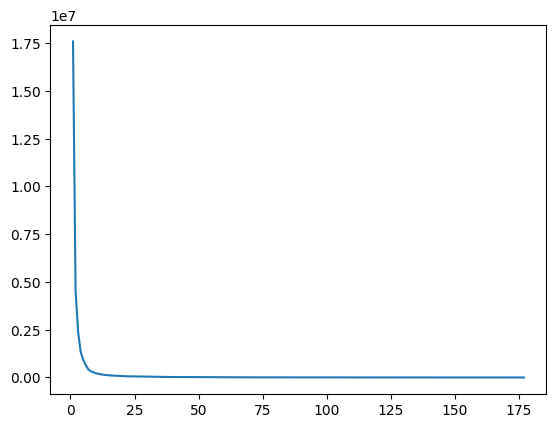

In [112]:
plt.plot(range(1,dataset.shape[0]),wcss)
plt.show()

- Optimal k değeri olarak 6 seçildi.

# Verinin Ölçeklendirilmesi

In [113]:
dataset3 = dataset.copy()

In [114]:
scaler = MinMaxScaler()
scaler.fit(dataset3)
dataset3=scaler.transform(dataset3)

In [115]:
(pd.DataFrame(dataset3)).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [116]:
dataset3_df = pd.DataFrame(dataset3, columns = dataset.columns)

# K-Means Algoritmasının Uygulanması

In [117]:
clustering_kmeans = KMeans(n_clusters=6,n_init = 10)
dataset3_df['clusters'] = clustering_kmeans.fit_predict(dataset3_df)

In [123]:
dataset3_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,4


## Temel Bileşen Analizi kullanılarak verinin 2 boyutlu uzaydaki izdüşümünün elde edilmesi

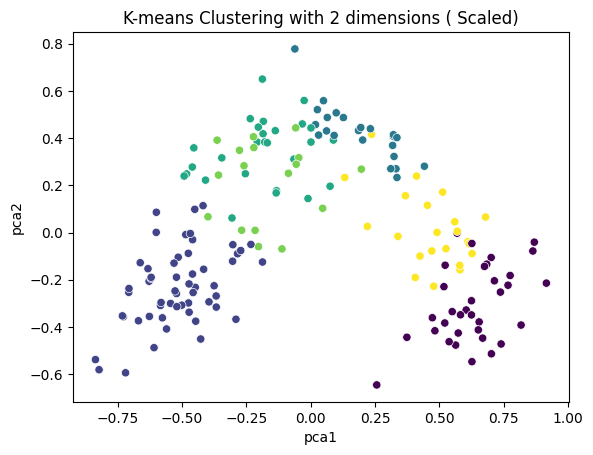

In [132]:
plt.clf()
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(dataset3_df.loc[:,'Alcohol':'Proline'])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", data=results, c = dataset3_df['clusters'])
plt.title('K-means Clustering with 2 dimensions ( Scaled)')
plt.show()